In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')

## EDA

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.rename(columns={'Gender': 'gender', "Age": 'age', 'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'}, inplace=True)
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.nunique()

CustomerID        200
gender              2
age                51
annual_income      64
spending_score     84
dtype: int64

In [7]:
df.set_index('CustomerID', inplace=True)
df.head()

,gender,age,annual_income,spending_score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [8]:
df.isnull().sum()

gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [9]:
df.dtypes

gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

In [10]:
df[['age', 'annual_income', 'spending_score']].describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## Data visualization

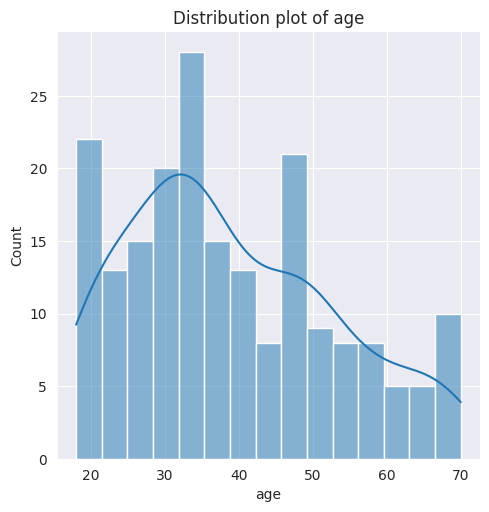

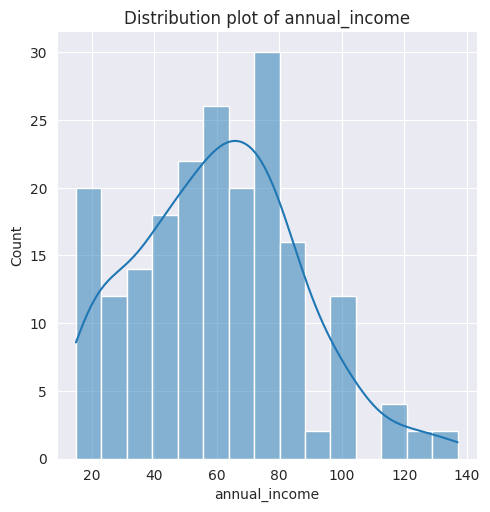

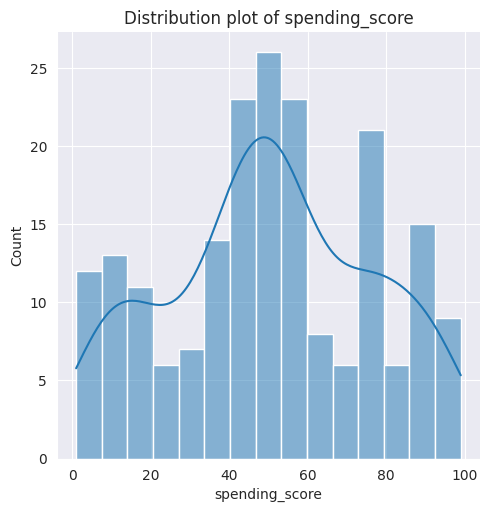

In [11]:
for column in ['age', 'annual_income', 'spending_score']:
    sns.displot(df, x=column, kde=True, bins=15)
    plt.title(f"Distribution plot of {column}")

Text(0.5, 1.0, 'Countplot of gender attribute')

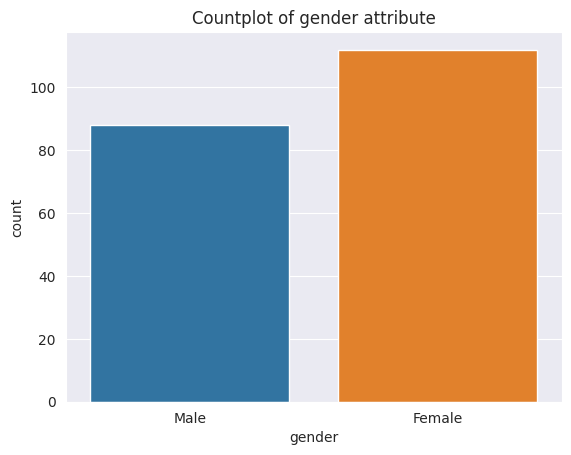

In [12]:
sns.countplot(df, x='gender')
plt.title("Countplot of gender attribute")

<Axes: >

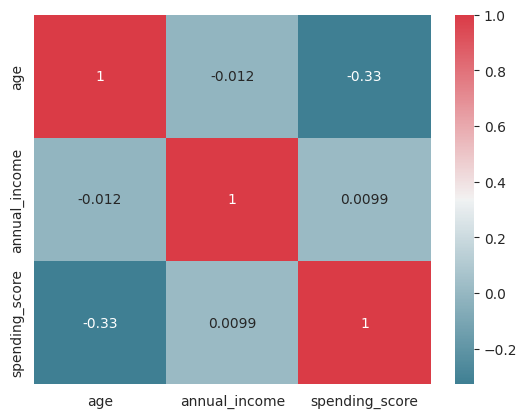

In [13]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age', 'annual_income', 'spending_score']].corr(), annot=True, cmap=cmap)

There is weak correlation between attributes.

<Axes: xlabel='age', ylabel='annual_income'>

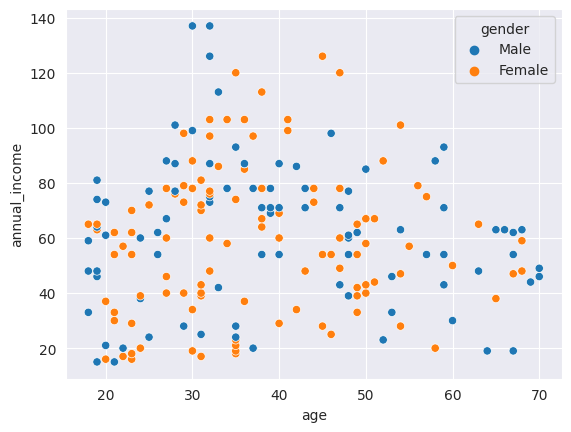

In [14]:
sns.scatterplot(df, x='age', y='annual_income', hue='gender')

<Axes: xlabel='spending_score', ylabel='annual_income'>

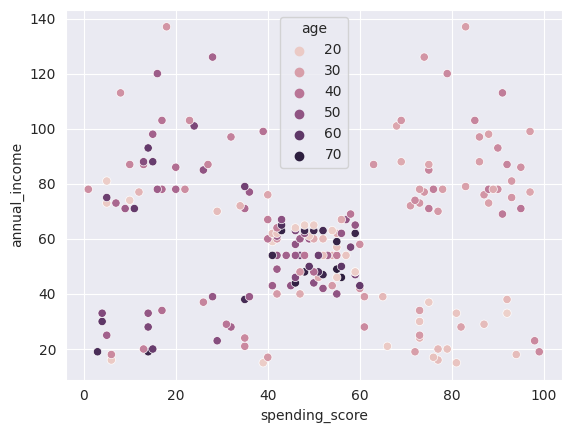

In [15]:
sns.scatterplot(df, x='spending_score', y='annual_income', hue='age')

From this graph we can see that trere are 5 clusters.

<Axes: xlabel='age', ylabel='spending_score'>

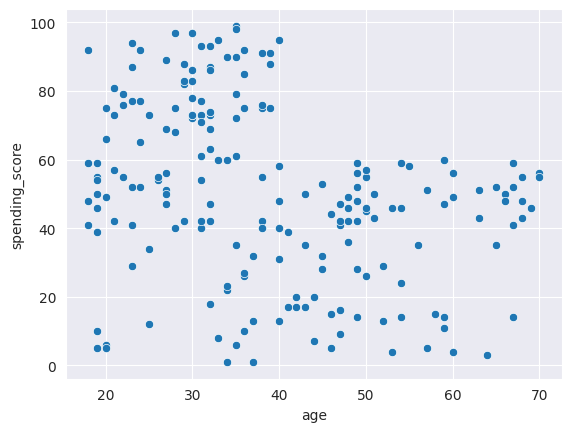

In [16]:
sns.scatterplot(df, x='age', y='spending_score')

From the last two scatterplots, we can see that people aged 40 and above have a spending score of less than approximately 60, while younger individuals tend to buy more.

In [17]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
df['encoded_gender'] = le.fit_transform(df['gender'])
df.head()

,gender,age,annual_income,spending_score,encoded_gender
CustomerID,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,0
4,Female,23,16,77,0
5,Female,31,17,40,0


In [19]:
tsne = TSNE().fit_transform(df.drop(columns=['gender']))
tsne

array([[-6.7434993e+00,  5.9017286e+00],
       [-4.6497938e-01,  9.7477751e+00],
       [-9.1199312e+00,  6.7029886e+00],
       [-8.3581686e-01,  9.4824505e+00],
       [-7.0649638e+00,  5.6449227e+00],
       [-9.1457105e-01,  9.3372059e+00],
       [-9.6180601e+00,  6.3490777e+00],
       [ 2.7478319e-01,  9.8695116e+00],
       [-1.1060056e+01,  5.2911777e+00],
       [-1.1812930e+00,  8.8312798e+00],
       [-1.0954991e+01,  4.8162899e+00],
       [ 6.6286904e-01,  1.0149713e+01],
       [-1.0478345e+01,  4.8915014e+00],
       [-5.1908296e-01,  9.0043945e+00],
       [-9.3442717e+00,  5.9922929e+00],
       [-3.1449229e-01,  9.1827374e+00],
       [-7.5529242e+00,  5.4080501e+00],
       [-1.4558865e+00,  8.5607061e+00],
       [-9.2186394e+00,  4.4720302e+00],
       [ 8.3991325e-01,  9.9375277e+00],
       [-7.5848498e+00,  5.2674346e+00],
       [-7.0234460e-01,  8.4775515e+00],
       [-1.0142119e+01,  5.8633494e+00],
       [-8.9432883e-01,  8.2515965e+00],
       [-1.01526

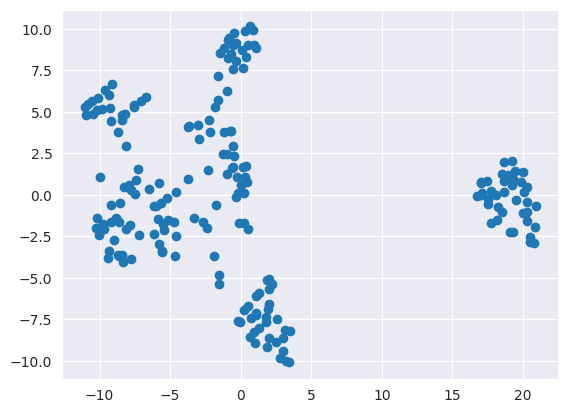

In [20]:
plt.scatter(tsne[:, 0], tsne[:, 1])

In [21]:
pca = PCA(2).fit_transform(df.drop(columns=['gender']))
pca

array([[-3.18699448e+01, -3.30012521e+01],
       [ 7.64494048e-01, -5.68429006e+01],
       [-5.74082757e+01, -1.31249607e+01],
       [-2.16854252e+00, -5.34785900e+01],
       [-3.21740846e+01, -3.03884119e+01],
       [-2.17695183e+00, -5.22272685e+01],
       [-5.90656895e+01, -9.54376302e+00],
       [ 1.23708622e+01, -6.16180208e+01],
       [-6.63157690e+01, -3.21423160e+00],
       [-5.65556212e+00, -4.72672225e+01],
       [-5.82365979e+01, -9.13418751e+00],
       [ 1.46218043e+01, -6.21075685e+01],
       [-5.51608374e+01, -1.00799251e+01],
       [-3.02878331e-03, -5.01140754e+01],
       [-5.27646657e+01, -1.16807468e+01],
       [ 1.94661180e+00, -5.15222086e+01],
       [-3.45055496e+01, -2.37615402e+01],
       [-7.30493262e+00, -4.35151138e+01],
       [-4.12573070e+01, -1.64734737e+01],
       [ 1.61902860e+01, -5.83001207e+01],
       [-3.27400141e+01, -2.13347966e+01],
       [-9.81885245e-01, -4.44524038e+01],
       [-5.78100898e+01, -1.87057486e+00],
       [-1.

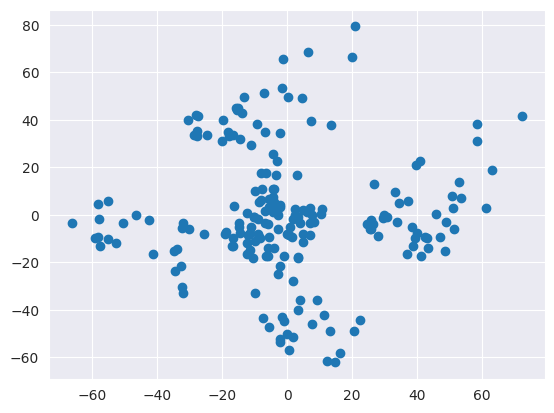

In [22]:
plt.scatter(pca[:, 0], pca[:, 1])

In [23]:
intertia = []
for n in range(1, 11):
    alg = KMeans(n_clusters=n)
    alg.fit(df.drop(columns=['gender']))
    intertia.append(alg.inertia_)

/home/gudleifr/PycharmProjects/VENV/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gudleifr/PycharmProjects/VENV/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gudleifr/PycharmProjects/VENV/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gudleifr/PycharmProjects/VENV/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.

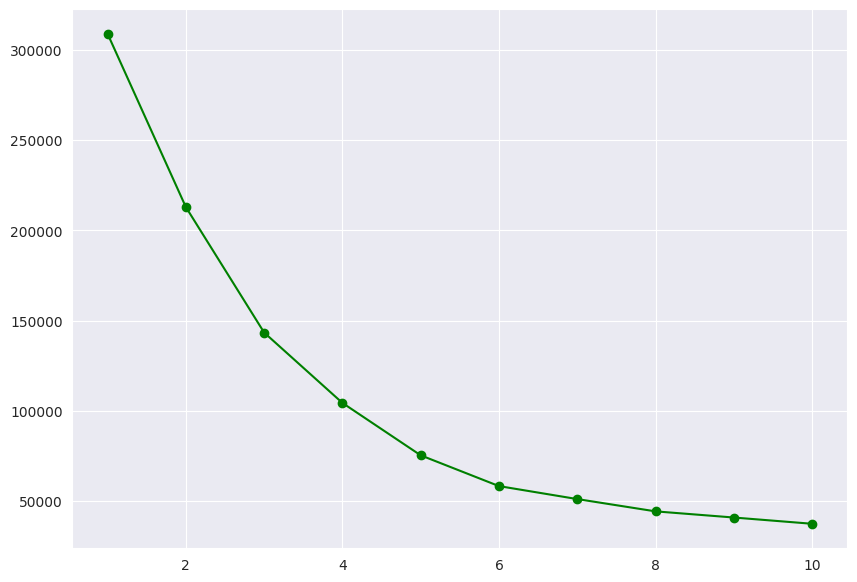

In [24]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), intertia, 'go-')
plt.show()

It seems that having 5 clusters is optimal because using more than 5 clusters does not significantly reduce inertia.

In [25]:
alg = KMeans(n_clusters=5)
alg.fit(df.drop(columns=['gender']))
df['class'] = alg.predict(df.drop(columns=['gender']))
df.head()

/home/gudleifr/PycharmProjects/VENV/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,gender,age,annual_income,spending_score,encoded_gender,class
CustomerID,,,,,,
1,Male,19,15,39,1,2
2,Male,21,15,81,1,3
3,Female,20,16,6,0,2
4,Female,23,16,77,0,3
5,Female,31,17,40,0,2


<Axes: xlabel='annual_income', ylabel='spending_score'>

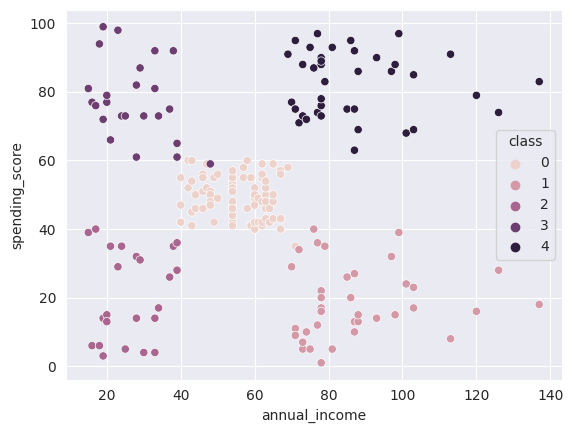

In [26]:
sns.scatterplot(df, x='annual_income', y='spending_score', hue='class')


From this graph, we can identify five distinct customer segments:

* Those with both low annual income and low spending scores.
* Customers with low annual income but high spending scores.
* Customers with higher annual income, yet spending scores lower than the mean value.
* Customers with high income and high spending scores.
* Average group with annual income and spending scores close to the means.

<Axes: xlabel='age', ylabel='annual_income'>

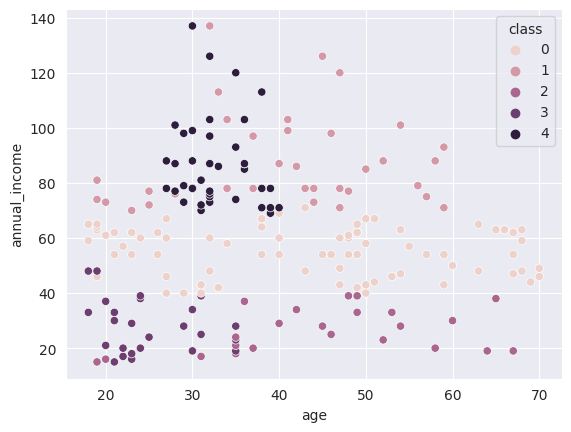

In [27]:
sns.scatterplot(df, x='age', y='annual_income', hue='class')

<Axes: xlabel='age', ylabel='spending_score'>

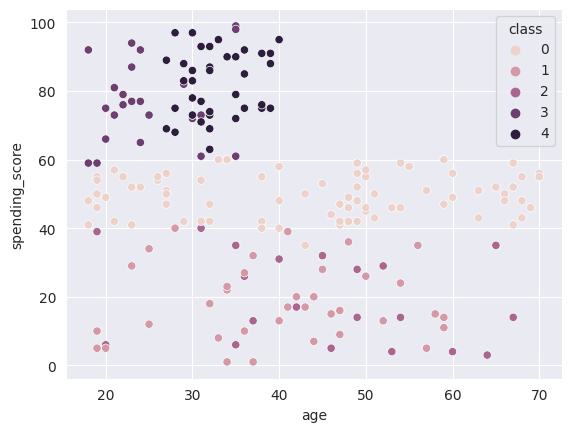

In [28]:
sns.scatterplot(df, y='spending_score', x='age', hue='class')